In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import scipy
from scipy import stats
from scanpy import AnnData
import seaborn as sns
import cobra as cb

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
npcs=[5,10,15,20]
neigh=[5,10,15,20]

In [4]:
strategy="magic_counts"

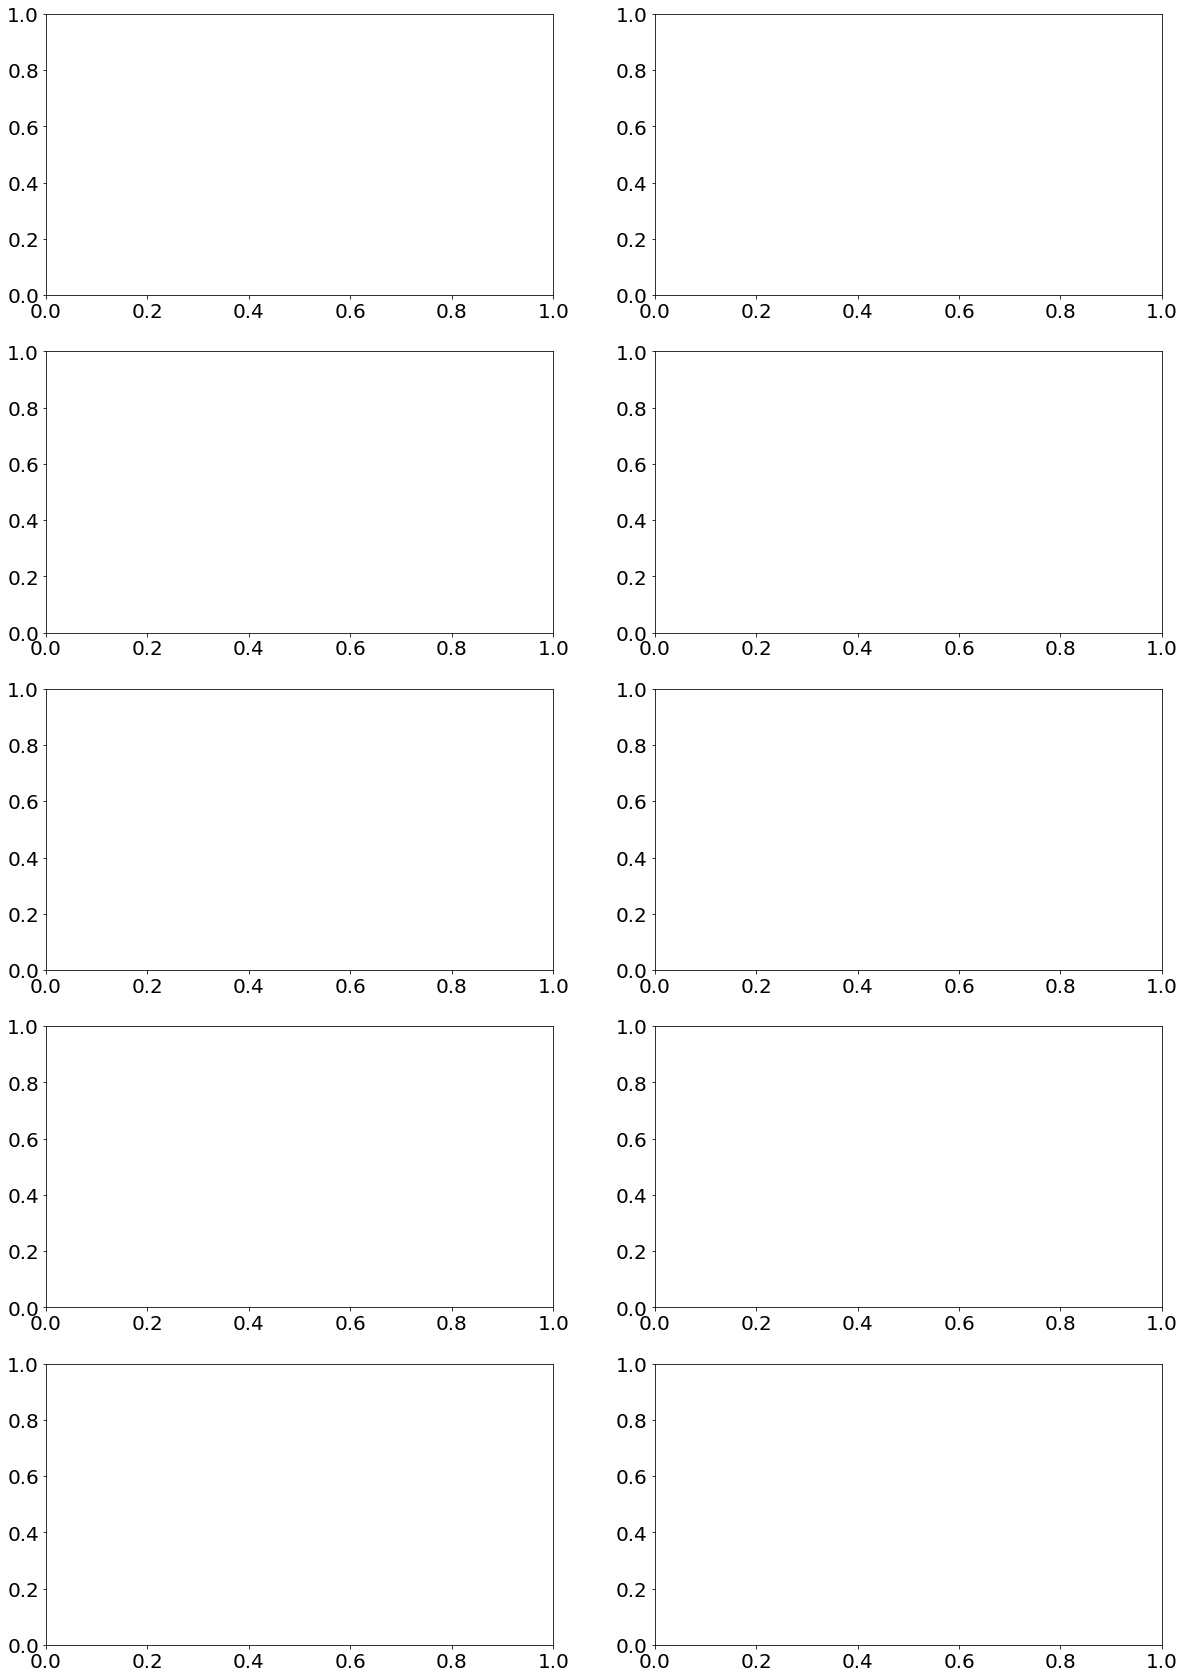

In [5]:
fig,axes=plt.subplots(5,2,figsize= (20,30))

In [6]:
j=0
for file_input in ["datasetGSE110949","datasetGSE118056"]:
    flux_adata=sc.read_h5ad("outputs/fluxes/"+file_input+"_"+strategy)
    flux_adata

    
    if file_input=="datasetGSE110949":
        df=pd.read_csv("outputs/cell_cycle_information/datasetGSE110949cell_cycle_phases.csv",index_col=0)
    else:
        df=pd.read_csv("outputs/cell_cycle_information/datasetGSE118056cell_cycle_phases.csv",index_col=0)

    flux_adata.obs["phase"]=df["phase"]
    flux_adata.obs["S_score"]=df["S_score"]
    flux_adata.obs["G2M_score"]=df["G2M_score"]
    #flux_adata.obs=flux_adata.obs.sort_values(by="phase")

    fluxes=flux_adata.to_df().T

    r, p = scipy.stats.spearmanr(fluxes.loc["Biomass"].values,flux_adata.obs["S_score"].values)
    sns.scatterplot(fluxes.loc["Biomass"].values,flux_adata.obs["S_score"].values,hue=flux_adata.obs["phase"].values,ax=axes[3,j])    
    
    axes[3,j].set_xlabel("Biomass")
    axes[3,j].set_ylabel("S_score")
    axes[3,j].title.set_text("".join(['r: ',str(np.round(r,2))," ","p: ",format(p,'.1E') ]))
    axes[3,j].grid()
    
    r, p = scipy.stats.spearmanr(fluxes.loc["Biomass"].values,flux_adata.obs["G2M_score"].values)
    sns.scatterplot(fluxes.loc["Biomass"].values,flux_adata.obs["G2M_score"].values,hue=flux_adata.obs["phase"].values,ax=axes[4,j])
    
    axes[4,j].set_xlabel("Biomass")
    axes[4,j].set_ylabel("G2M_score")
    axes[4,j].title.set_text("".join(['r: ',str(np.round(r,2))," ","p: ",format(p,'.1E') ]))
    axes[4,j].grid()
    
    adata2=AnnData(fluxes.T)
    adata2.obs=flux_adata.obs
    adata2

    sc.pl.violin(adata2,keys=["Biomass"],groupby="phase",order =["G1","S","G2M"],ax=axes[2,j])


    index=flux_adata.to_df().loc[flux_adata.to_df()["Biomass"]>0].index
    flux_adata=flux_adata[index,:]

    #sc.pp.filter_genes(flux_adata,min_cells=1)
    sc.pp.scale(flux_adata)
    sc.tl.pca(flux_adata, svd_solver='arpack')

    sc.pp.neighbors(flux_adata, n_neighbors=15 ,n_pcs=5)
    sc.tl.umap(flux_adata,random_state=0)#,init_pos="paga")#,n_components=3)
    sc.pl.umap(flux_adata, color=['countmatrix_Type'],title="",return_fig=False,ax=axes[0,j],legend_fontsize=10)  

    sc.pl.umap(flux_adata, color=['phase'],title="",return_fig=False,ax=axes[1,j],legend_fontsize=10)  
    
    j=j+1

C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\bruno.galuzzi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.1

In [7]:

axes[0,0].annotate("A", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[1,0].annotate("C", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[2,0].annotate("E", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[3,0].annotate("G", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[4,0].annotate("I", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)

axes[0,1].annotate("B", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[1,1].annotate("D", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[2,1].annotate("F", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[3,1].annotate("H", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)
axes[4,1].annotate("L", xy=(-0.2, 0.9), xycoords="axes fraction",fontsize=30)

Text(-0.2, 0.9, 'L')

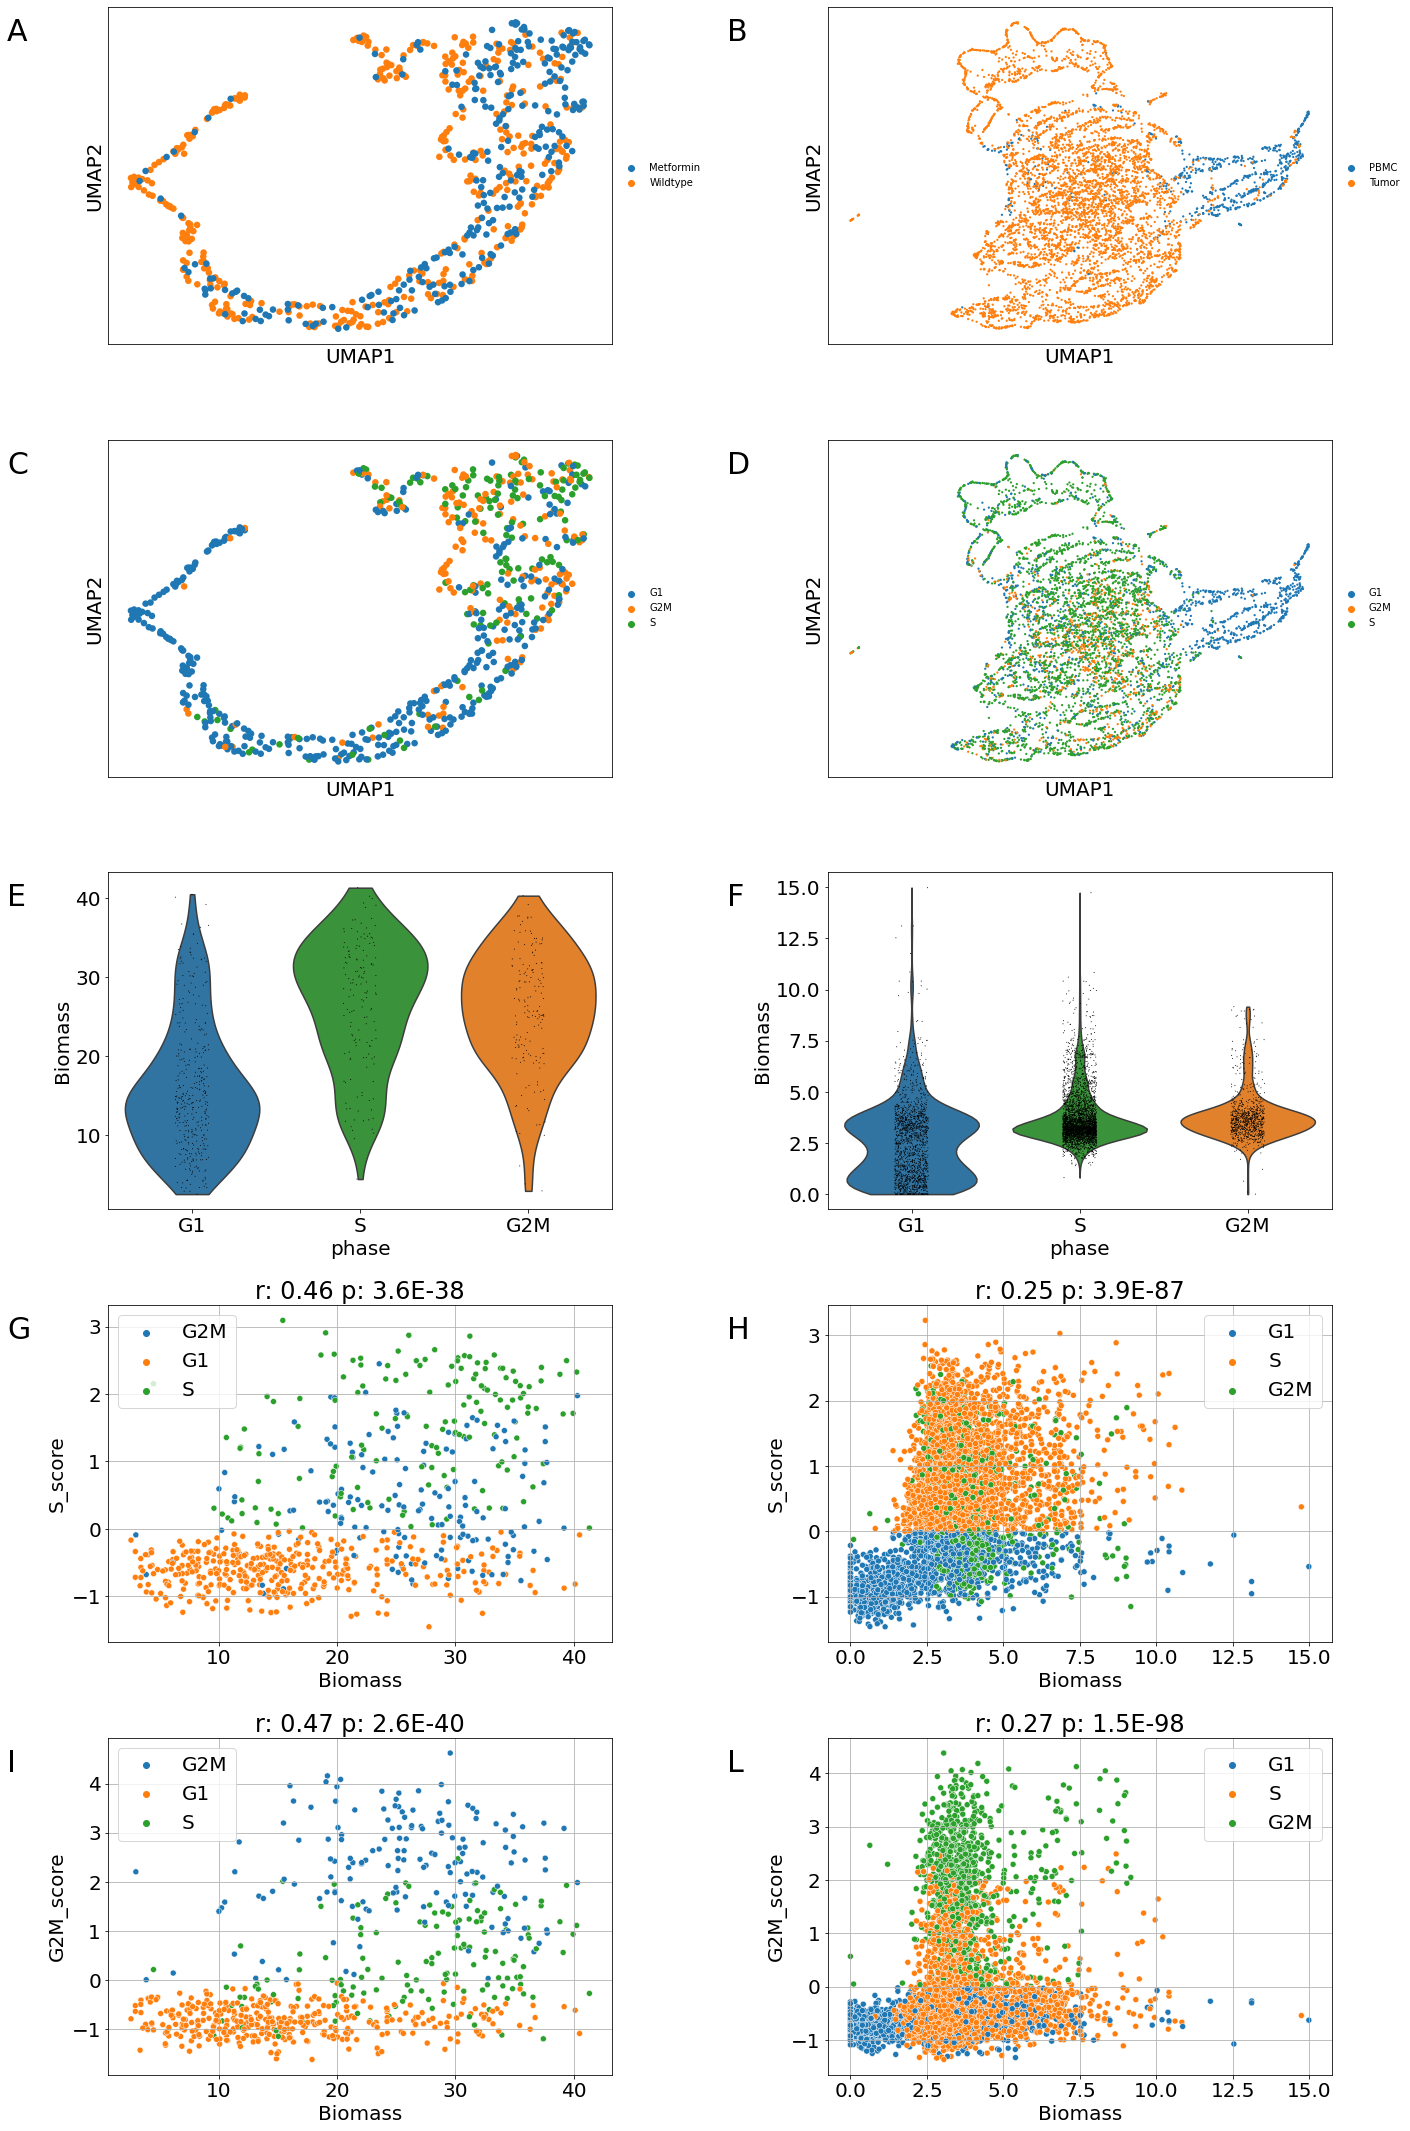

In [8]:
fig.tight_layout()
fig

In [9]:
fig.savefig("images/biomass_vs_cellcycle_analysis.png")